In [43]:
# Importing dataset 

import pandas as pd
dataset=pd.read_csv("C:/Users/kamal/Downloads/archive/Student_Marks.csv")
dataset.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [44]:
# Cleaning dataset

dataset["Marks"]=dataset["Marks"].round(1)
dataset["time_study"]=dataset["time_study"].round(1)
dataset["number_courses"]=dataset["number_courses"].round(1)
dataset.head()

,number_courses,time_study,Marks
0,3,4.5,19.2
1,4,0.1,7.7
2,4,3.1,13.8
3,6,7.9,53.0
4,8,7.8,55.3


In [45]:
# Importing required libraries

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,mean_squared_error,r2_score

In [46]:
# Creating model

model=LinearRegression()

In [47]:
# Splitting data for training and testing

x=dataset[["time_study","number_courses"]]
y=dataset["Marks"]


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

#
y_train=y_train.to_frame()
y_test=y_test.to_frame()


In [48]:
# Creating model

model.fit(x_train,y_train)

LinearRegression()

In [49]:
# Making predicitons and measuring the accuracy of the model

y_predict=model.predict(x_test)

print("Mean absolute Error",mean_absolute_error(y_test,y_predict))
print("Mean squared error", mean_squared_error(y_test,y_predict))
print("Root mean squared Error",root_mean_squared_error(y_test,y_predict))
print("R square value",r2_score(y_test,y_predict))

Mean absolute Error 3.036503702294718
Mean squared error 12.926520299274124
Root mean squared Error 3.595347034609333
R square value 0.9455079871836954


In [50]:
# Listing Actual values and Predicted values 

results = pd.DataFrame({'actual_marks': y_test.values.flatten(), 'Predicted': y_predict.flatten()})
print(results.head())

   actual_marks  Predicted
0          16.1  19.369214
1          36.7  37.647593
2          16.6  20.074233
3           8.9   9.898811
4           9.7  11.266256


In [51]:
# To improve more precision, try polynomial regression 

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)


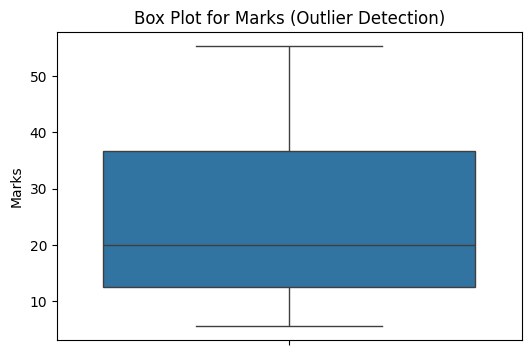

In [52]:
# To check whether dataset is suitable for using Polynomial Regression

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(y=dataset["Marks"])
plt.title("Box Plot for Marks (Outlier Detection)")
plt.show()

In [53]:
# Training model with the data that is transformed to polynomial feature

model1 = LinearRegression()
model1.fit(X_train_poly, y_train)

pred = model1.predict(X_test_poly)


In [54]:
# Measuring the metrics for the Polynomial Regression model

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse=root_mean_squared_error(y_test,pred)
r2 = r2_score(y_test, pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root mean square error: {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 0.26821548966518377
Mean Squared Error: 0.12353072383664127
Root mean square error: 0.3514693782346355
R² Score: 0.9994792536869422


In [ ]:
#Results after using Polynomial Regression Model

poly_results = pd.DataFrame({'org_marks': y_test.values.flatten(), 'Predicted': pred.flatten()})
print(poly_results.head())

   org_marks  Predicted
0       16.1  15.829483
1       36.7  36.535409
2       16.6  16.454637
3        8.9   8.616485
4        9.7  10.004770
